In [1]:
### [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측

# ** 특성 이름을 담고 있는 key값 = feature_names
# ** 특성 데이터를 담고 있는 key값 = data
# ** 범주 와인의 종류를 담고 있는 key값 = target_names
#    - 범주는 'class 0'과 'class_1'만 사용( 0과 1로 변경해서 사용)
#    - (0 = 레드와인, 1 = 화이트와인)

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [4]:
data = wine_all['data']
target = wine_all['target']

data = data[target != 2]
target = target[target !=2]
print(data.shape)
target.shape

(130, 13)


(130,)

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42)

In [6]:
#정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)
print("-----------------------")
print(train_scaled.shape)
print("-----------------------")
print(test_scaled.shape)

[1.29147423e+01 2.01659794e+00 2.34649485e+00 1.91020619e+01
 9.81340206e+01 2.51402062e+00 2.45134021e+00 3.40515464e-01
 1.70453608e+00 4.11742268e+00 1.05185567e+00 2.93185567e+00
 7.61061856e+02] [8.78710504e-01 9.41769432e-01 3.06234333e-01 3.68194198e+00
 1.37283129e+01 5.61135924e-01 7.63649173e-01 1.08934589e-01
 5.48662893e-01 1.62462004e+00 1.51339925e-01 4.94300151e-01
 3.36251281e+02]
-----------------------
(97, 13)
-----------------------
(33, 13)


In [7]:
### k-최근접이웃분류 모델로 테스트
from sklearn.neighbors import KNeighborsClassifier

kn =KNeighborsClassifier()

kn.n_neighbors=2
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

print(kn.predict(test_scaled[:5]))

0.9484536082474226
0.9393939393939394
[0 0 0 0 1]


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

- 로지스틱 회귀분류

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

##3 훈련모델 분류 정확도 확인하기
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

### 계수, y절편
print(lr.coef_, lr.intercept_)

1.0
0.9696969696969697
[[-1.34042439 -0.42396492 -0.75514758  1.26006583 -0.38512244  0.20744561
  -0.32369922  0.15556911 -0.06902939 -0.64960182  0.13388669 -0.63907256
  -1.74766882]] [0.51706466]


In [69]:
import pandas as pd

column_names = wine_all['feature_names']
wine_df = pd.DataFrame(data, columns = column_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
pre_data = wine_df.to_numpy()
class_pred = ss.transform(pre_data)

In [71]:
result_predict = lr.predict(class_pred)

wine_df['class'] = target
wine_df['class_pred'] = result_predict

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


In [15]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_df[(wine_df["class"] == wine_df["class_pred"])])
o_cnt

x_cnt = len(wine_df[(wine_df["class"] != wine_df["class_pred"])])
x_cnt

sum_cnt = len(wine_df)
sum_cnt 

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))
print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[129]건, 오답 갯수[1]건
총 100.0% 중 정답률[99.23%], 오답률[0.77%]


- SGD

In [31]:
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델) 생성
sc = SGDClassifier(loss='log',max_iter=20, random_state=30)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9696969696969697


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [17]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정(실제로는 새로운 데이터 사용)
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9696969696969697


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
import numpy as np

sc = SGDClassifier(loss = 'log', random_state=30)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300):
    sc.partial_fit(train_scaled,  train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    
train_score

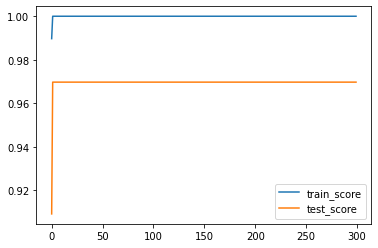

In [19]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.legend()
plt.show()

In [43]:
### 최적의 에포크값 이용해 처음부터 훈련 시작
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델) 생성
# tol = None : 스스로 훈련이 끝나도 멈추지 말고 지정값까지 돌게 함
sc = SGDClassifier(loss='log',max_iter=100, tol=None, random_state=30)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9696969696969697


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [72]:
result_predict = sc.predict(class_pred)

wine_df['sgd_pred'] = result_predict

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_pred,sgd_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,0


In [22]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_df[(wine_df["class"] == wine_df["sgd_pred"])])
o_cnt

x_cnt = len(wine_df[(wine_df["class"] != wine_df["sgd_pred"])])
x_cnt

sum_cnt = len(wine_df)
sum_cnt 

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))
print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[129]건, 오답 갯수[1]건
총 100.0% 중 정답률[99.23%], 오답률[0.77%]


- 결정트리

In [73]:
wine = wine_df.drop(['class_pred','sgd_pred'], axis=1)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [50]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


In [51]:
wine_input = wine[['alcohol','malic_acid', 'ash', 'alcalinity_of_ash',
                   'magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
                   'proanthocyanins','color_intensity','hue',
                   'od280/od315_of_diluted_wines','proline']].to_numpy()
wine_target = wine['class'].to_numpy()

In [52]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, random_state=42)

In [53]:
### 정규화(표준화) -> 독립변수 표준점수로 동일하게 표준화(스케일)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)
print("-----------------------")
print(train_scaled.shape)
print("-----------------------")
print(test_scaled.shape)

[1.29147423e+01 2.01659794e+00 2.34649485e+00 1.91020619e+01
 9.81340206e+01 2.51402062e+00 2.45134021e+00 3.40515464e-01
 1.70453608e+00 4.11742268e+00 1.05185567e+00 2.93185567e+00
 7.61061856e+02] [8.78710504e-01 9.41769432e-01 3.06234333e-01 3.68194198e+00
 1.37283129e+01 5.61135924e-01 7.63649173e-01 1.08934589e-01
 5.48662893e-01 1.62462004e+00 1.51339925e-01 4.94300151e-01
 3.36251281e+02]
-----------------------
(97, 13)
-----------------------
(33, 13)


In [54]:
### 사용하는 클래스 : DecisionTreeClassifier
### 사용하는 패키지 : sklearn.tree

from sklearn.tree import DecisionTreeClassifier

### 클래스 생성

dtc = DecisionTreeClassifier(random_state=30)

dtc.fit(train_scaled, train_target)

print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

### (해석)
# - 훈련결과는 아주 우수하나 테스트 결과가 상대적으로 낮게 나옴
# - 과대적합 발생

1.0
0.9696969696969697


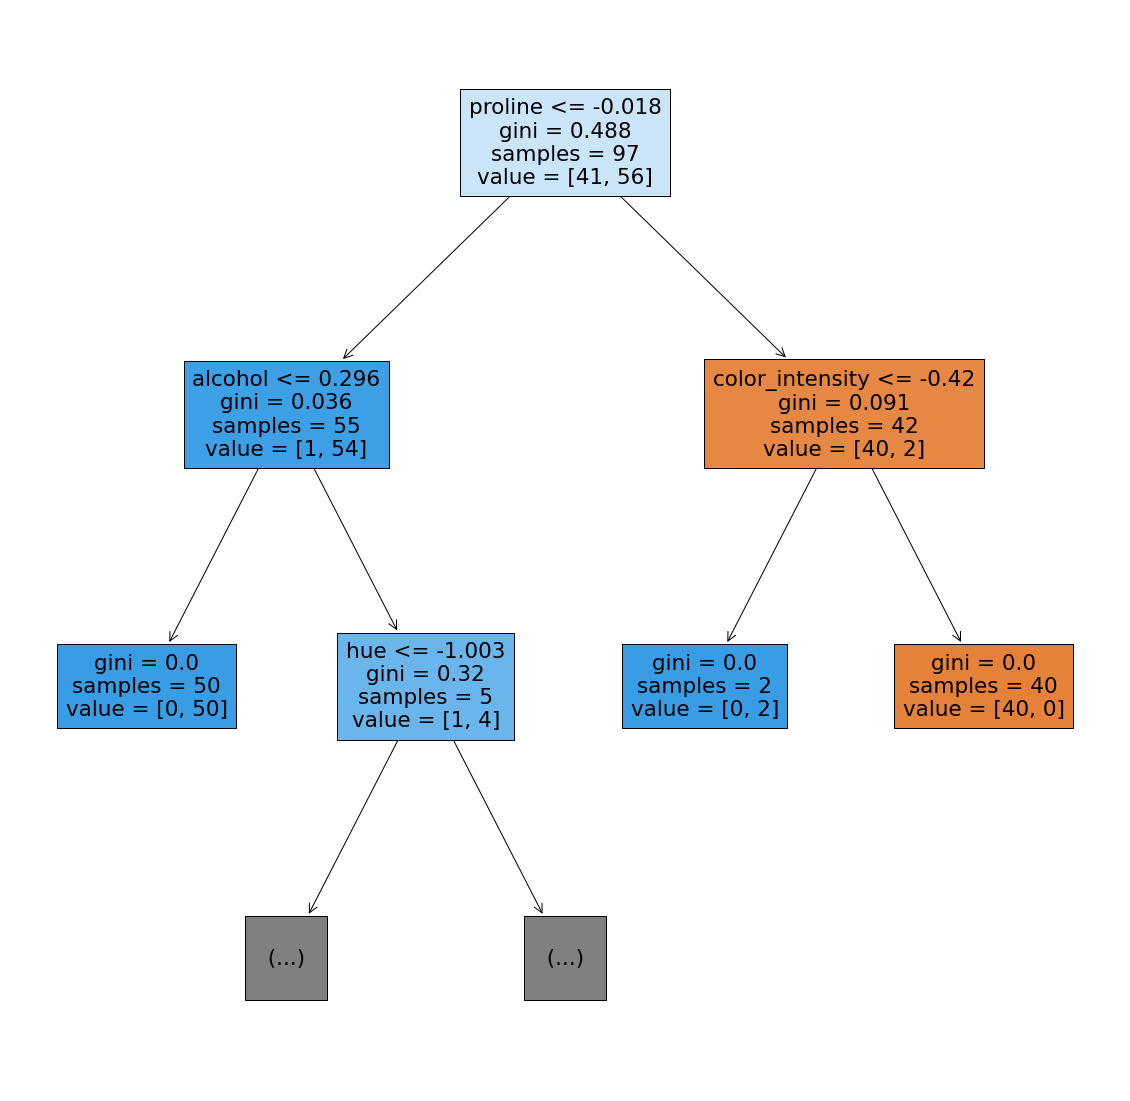

In [55]:
### 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dtc, max_depth=2, filled=True, feature_names=['alcohol','malic_acid', 'ash', 'alcalinity_of_ash',
                   'magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
                   'proanthocyanins','color_intensity','hue',
                   'od280/od315_of_diluted_wines','proline'])
plt.show()

- -특성중요도

In [57]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


In [56]:
print(dtc.feature_importances_)

[0.00768134 0.         0.         0.         0.         0.
 0.         0.         0.         0.08047121 0.03379791 0.
 0.87804953]


In [62]:
## 알콜+proline -> 최적

w = wine[['alcohol','proline']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.979381443298969
0.9696969696969697


In [63]:
# 알콜+ hue

w = wine[['alcohol','hue']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.9381443298969072
0.9393939393939394


In [64]:
## 알콜+color_intensity

w = wine[['alcohol','color_intensity']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.9587628865979382
0.9696969696969697


In [65]:
# proline+ hue

w = wine[['proline','hue']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_stateeff=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.9587628865979382
0.9393939393939394


In [66]:
# proline+ color_intensity 

w = wine[['proline','color_intensity']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.979381443298969
1.0


In [67]:
# hue+ color_intensity

w = wine[['hue','color_intensity']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(w, wine_target, random_state=30)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.8762886597938144
0.9090909090909091


In [ ]:
### (해석)
# - k-최근접이웃의 훈련데이터는 0.9484, 테스트데이터는 0.9394
# - 로지스틱회귀분류, sgd는 훈련과 테스트가 각각 1.0 과 0.9696이 나옴.
# - 둘에 비해 k-최근접이웃의 정확도가 떨어짐
# - 전부 훈련데이터가 테스트데이터보다 높게 나왔으며
# - 전부 0.9 이상의 수치를 보이므로 사용하기 적합해 보인다.

# - alcohol과 proline이 훈련에 영향을 많이 미쳤다고 판단